In [44]:
import math
from typing import (Dict, Tuple)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [47]:
data = datasets.load_iris()
data = pd.DataFrame(data.data, columns=data.feature_names)


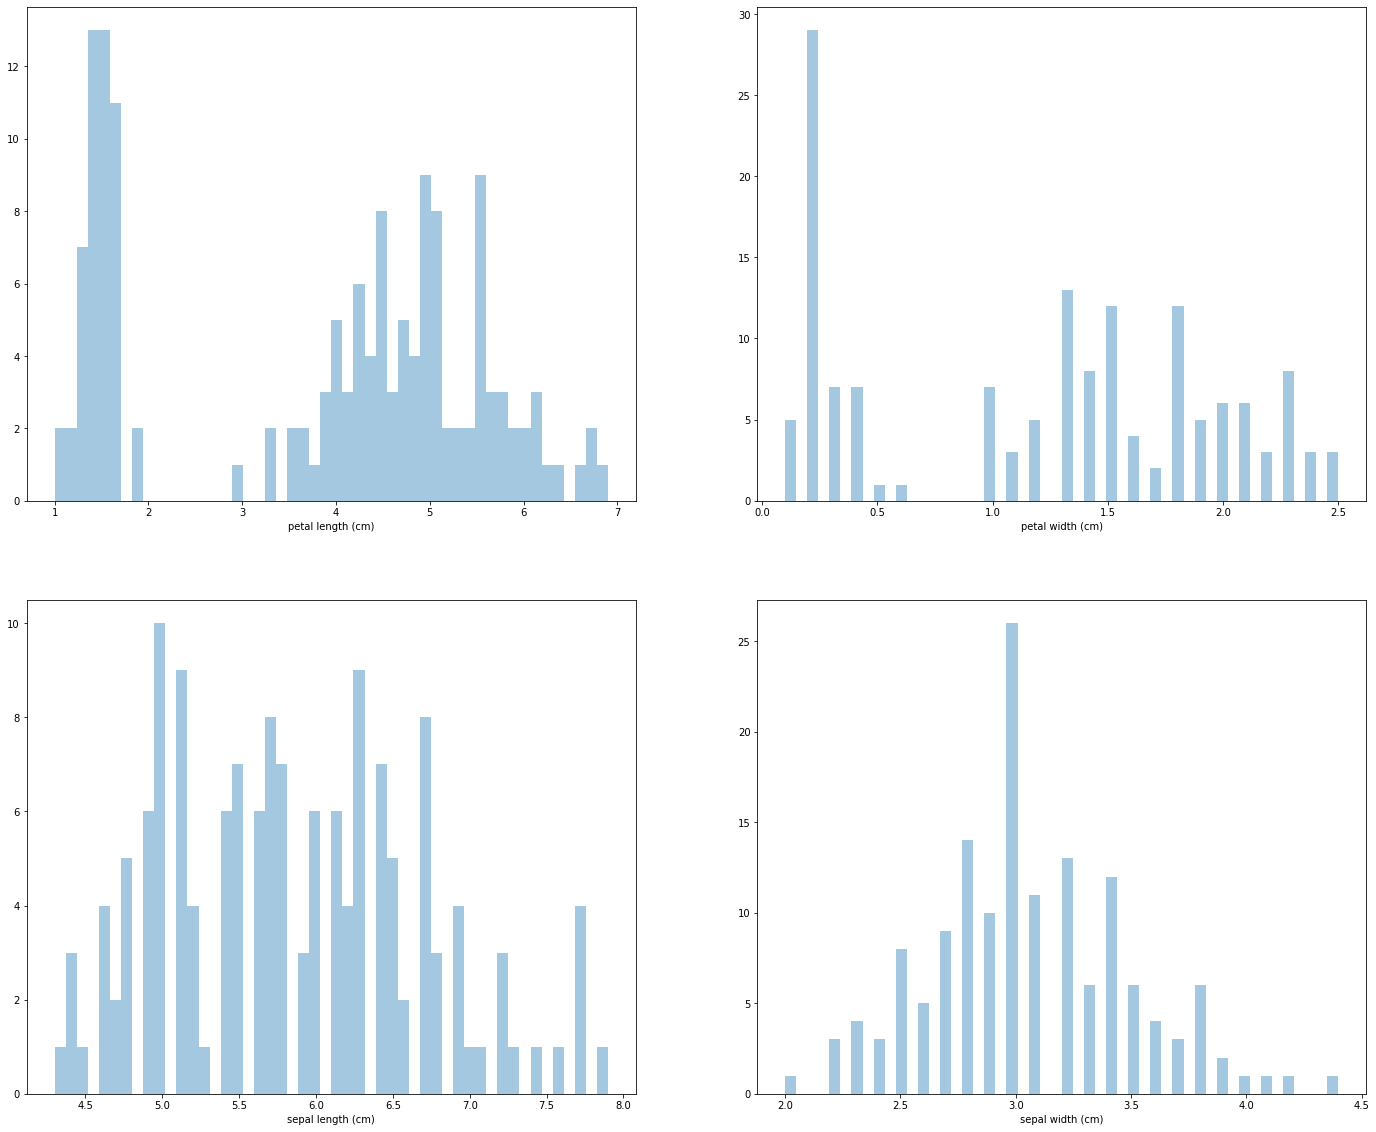

In [49]:
def df_hist(df: pd.DataFrame,
            figsize: Tuple =(24, 20),
            dist_args: Dict ={'bins':50, 'kde':False}):
    # Remove non numeric types
    types_to_remove = [str(), bool()]
    columns_to_drop = []
    for c in df.columns:
        if type(data[c][0]) in list(map(type, types_to_remove)):
            columns_to_drop.append(c)
    df = df.drop(columns=columns_to_drop)
    
    # Set figure size to smallest n where n*n > len(df.columns)
    size = int(math.ceil(len(df.columns)**0.5))
    fig, ax = plt.subplots(size, size, figsize=figsize)
    
    # plot histograms in grid of axes
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            data_index = i*ax.shape[1]+j
            if data_index < len(df.columns):
                sns.distplot(df[df.columns.sort_values()[data_index]], ax=ax[i][j], **dist_args)

    # Remove unused axes
    for i in range(len(df.columns), size ** 2):
        fig.delaxes(ax[i // size][i % size])

df_hist(data)

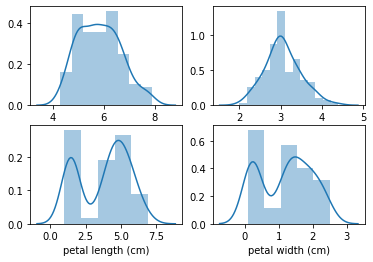

In [40]:
n = int(len(df.columns)**0.5)
fig, ax = plt.subplots(n, n)
for i in range(4):
    sns.distplot(df[df.columns[i]], ax=ax[i//n,i%n])

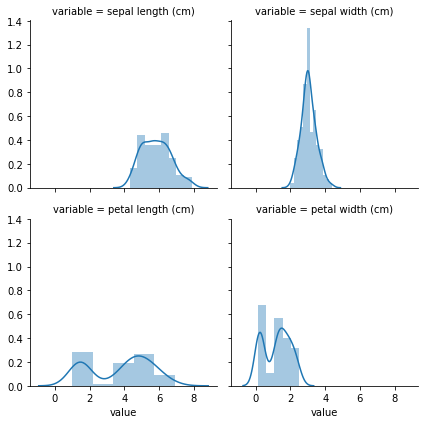

In [42]:
g = sns.FacetGrid(df.melt(), col='variable', col_wrap=2)
g.map(sns.distplot, 'value')